<a href="https://colab.research.google.com/github/MatteoAldovardi92/Taxi_Project/blob/main/TimeFeatures_Categorical_Features_Engeneering(RushHour).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import os
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# Define path inside Google Drive
drive_path = '/content/drive/MyDrive/datasets'

# Create the folder if it doesn't exist
os.makedirs(drive_path, exist_ok=True)


bog_df = pd.read_csv('/content/drive/MyDrive/datasets/bog_df.csv')
mex_df = pd.read_csv('/content/drive/MyDrive/datasets/mex_df.csv')
uio_df = pd.read_csv('/content/drive/MyDrive/datasets/uio_df.csv')





Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
bog_df.columns

Index(['vendor_id', 'pickup_datetime', 'dropoff_datetime', 'trip_duration',
       'dist_meters', 'wait_sec', 'geodetic_dist', 'mean_velocity'],
      dtype='object')

In [ ]:
import pandas as pd

# Assuming bog_df, mex_df, and uio_df are already loaded as shown in your code

# Convert 'pickup datetime' to datetime objects if it's not already
bog_df['pickup_datetime'] = pd.to_datetime(bog_df['pickup_datetime'])
mex_df['pickup_datetime'] = pd.to_datetime(mex_df['pickup_datetime'])
uio_df['pickup_datetime'] = pd.to_datetime(uio_df['pickup_datetime'])


# Extract date and hour for bog_df
bog_df['pickup_date'] = bog_df['pickup_datetime'].dt.date
bog_df['pickup_hour'] = bog_df['pickup_datetime'].dt.hour

# Extract date and hour for mex_df
mex_df['pickup_date'] = mex_df['pickup_datetime'].dt.date
mex_df['pickup_hour'] = mex_df['pickup_datetime'].dt.hour

# Extract date and hour for uio_df
uio_df['pickup_date'] = uio_df['pickup_datetime'].dt.date
uio_df['pickup_hour'] = uio_df['pickup_datetime'].dt.hour



In [ ]:
# Assuming 'trip_duration' column exists and is numeric

# Calculate the average trip duration for each day
daily_average_duration = bog_df.groupby('pickup_date')['trip_duration'].mean()

# Sort the results to find the days with the longest average duration
days_with_longest_trips = daily_average_duration.sort_values(ascending=False)

# Display the days with the longest average trip durations
print("Days with the longest average trip durations:")
print(days_with_longest_trips)


Days with the longest average trip durations:
pickup_date
2017-04-21    1.777778
2017-04-10    1.601667
2017-02-18    1.557778
2017-01-30    1.492315
2017-06-28    1.491458
                ...   
2016-09-05    0.106389
2017-04-24    0.092500
2017-02-09    0.084722
2016-09-25    0.080000
2017-07-11    0.047500
Name: trip_duration, Length: 359, dtype: float64


In [ ]:
# Assuming 'trip_duration' column exists and is numeric

# Calculate the average trip duration for each day
daily_average_duration = bog_df.groupby('pickup_hour')['trip_duration'].mean()

# Sort the results to find the days with the longest average duration
days_with_longest_trips = daily_average_duration.sort_values(ascending=False)

# Display the days with the longest average trip durations
print("Days with the longest average trip durations:")
print(days_with_longest_trips)


Days with the longest average trip durations:
pickup_hour
9     0.620672
10    0.609809
11    0.608511
1     0.603292
6     0.597469
12    0.585473
3     0.563198
5     0.563096
2     0.562553
7     0.550295
8     0.547760
4     0.521492
Name: trip_duration, dtype: float64


In [ ]:
bog_df['pickup_hour'].unique()


array([ 1,  3,  5,  7, 10,  6, 12,  2,  4,  8,  9, 11], dtype=int32)

In [ ]:
mex_df['pickup_datetime']

,pickup_datetime
0,2016-09-18 10:11:50
1,2016-09-18 10:23:38
2,2016-09-18 10:44:18
3,2016-09-18 11:00:00
4,2016-09-18 11:08:03
...,...
9489,2016-10-27 04:52:10
9490,2016-10-27 05:02:26
9491,2016-10-27 08:11:10
9492,2016-10-27 10:53:15


In [ ]:
uio_df['pickup_hour'].unique()

array([ 9,  4,  5,  7, 10, 11, 12,  1,  2,  6,  8,  3], dtype=int32)

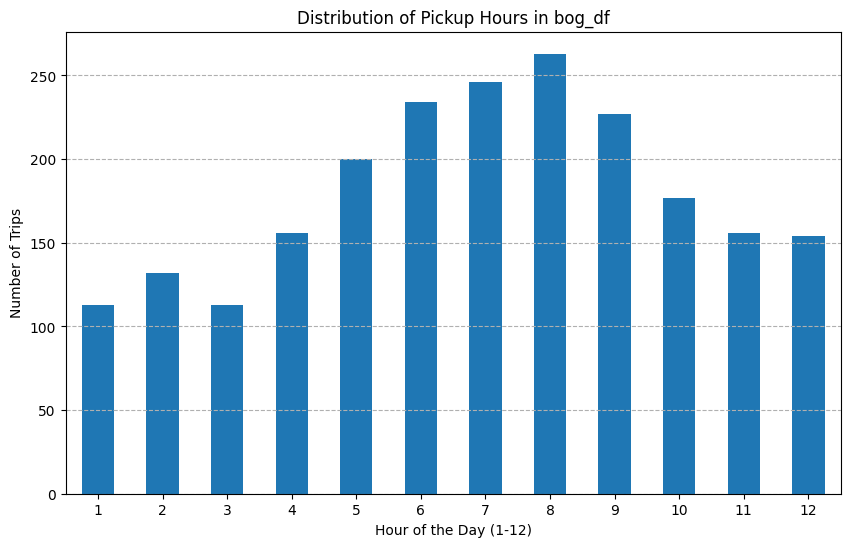

In [ ]:
import matplotlib.pyplot as plt

# Count the occurrences of each hour
hour_counts = bog_df['pickup_hour'].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(10, 6)) # Adjust figure size as needed
hour_counts.plot(kind='bar')
plt.title('Distribution of Pickup Hours in bog_df')
plt.xlabel('Hour of the Day (1-12)')
plt.ylabel('Number of Trips')
plt.xticks(rotation=0) # Keep x-axis labels horizontal
plt.grid(axis='y', linestyle='--') # Add a grid for better readability
plt.show()


In [ ]:
bog_df[['pickup_datetime', 'dropoff_datetime']]

,pickup_datetime,dropoff_datetime
0,2016-09-18 01:54:11,2016-09-18 02:17:49
1,2016-09-18 03:31:05,2016-09-18 03:44:06
2,2016-09-18 05:39:06,2016-09-18 06:37:07
3,2016-09-18 07:33:15,2016-09-18 08:07:08
4,2016-09-18 10:08:31,2016-09-18 10:11:42
...,...,...
2166,2016-10-27 06:37:55,2016-10-27 07:50:48
2167,2016-10-27 09:00:36,2016-10-27 09:52:21
2168,2016-10-27 11:09:08,2016-10-27 12:39:09
2169,2016-10-27 12:28:22,2016-10-27 01:16:58


Days with the longest average trip durations:
pickup_date
2017-04-21    1.777778
2017-04-10    1.601667
2017-02-18    1.557778
2017-01-30    1.492315
2017-06-28    1.491458
                ...   
2016-09-05    0.106389
2017-04-24    0.092500
2017-02-09    0.084722
2016-09-25    0.080000
2017-07-11    0.047500
Name: trip_duration, Length: 359, dtype: float64
Days with the longest average trip durations:
pickup_hour
9     0.620672
10    0.609809
11    0.608511
1     0.603292
6     0.597469
12    0.585473
3     0.563198
5     0.563096
2     0.562553
7     0.550295
8     0.547760
4     0.521492
Name: trip_duration, dtype: float64


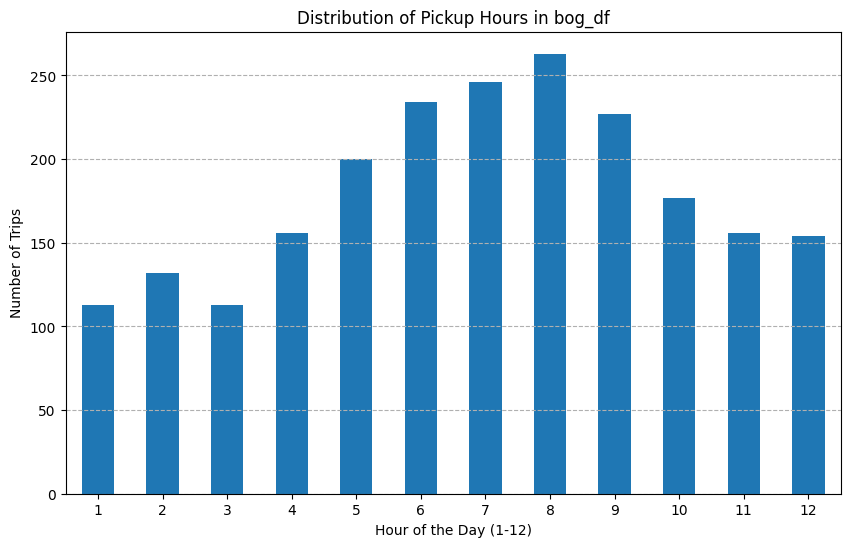

,pickup_datetime,dropoff_datetime
0,2016-09-18 01:54:11,2016-09-18 02:17:49
1,2016-09-18 03:31:05,2016-09-18 03:44:06
2,2016-09-18 05:39:06,2016-09-18 06:37:07
3,2016-09-18 07:33:15,2016-09-18 08:07:08
4,2016-09-18 10:08:31,2016-09-18 10:11:42
...,...,...
2166,2016-10-27 06:37:55,2016-10-27 07:50:48
2167,2016-10-27 09:00:36,2016-10-27 09:52:21
2168,2016-10-27 11:09:08,2016-10-27 12:39:09
2169,2016-10-27 12:28:22,2016-10-27 01:16:58


In [ ]:
import pandas as pd

# Assuming bog_df, mex_df, and uio_df are already loaded as shown in your code

# Convert 'pickup datetime' to datetime objects if it's not already
bog_df['pickup_datetime'] = pd.to_datetime(bog_df['pickup_datetime'])
mex_df['pickup_datetime'] = pd.to_datetime(mex_df['pickup_datetime'])
uio_df['pickup_datetime'] = pd.to_datetime(uio_df['pickup_datetime'])

# Convert 'dropoff_datetime' to datetime objects
bog_df['dropoff_datetime'] = pd.to_datetime(bog_df['dropoff_datetime'])
mex_df['dropoff_datetime'] = pd.to_datetime(mex_df['dropoff_datetime'])
uio_df['dropoff_datetime'] = pd.to_datetime(uio_df['dropoff_datetime'])


# Extract date and hour for bog_df
bog_df['pickup_date'] = bog_df['pickup_datetime'].dt.date
bog_df['pickup_hour'] = bog_df['pickup_datetime'].dt.hour

# Extract date and hour for mex_df
mex_df['pickup_date'] = mex_df['pickup_datetime'].dt.date
mex_df['pickup_hour'] = mex_df['pickup_datetime'].dt.hour

# Extract date and hour for uio_df
uio_df['pickup_date'] = uio_df['pickup_datetime'].dt.date
uio_df['pickup_hour'] = uio_df['pickup_datetime'].dt.hour


# Assuming 'trip_duration' column exists and is numeric

# Calculate the average trip duration for each day
daily_average_duration = bog_df.groupby('pickup_date')['trip_duration'].mean()

# Sort the results to find the days with the longest average duration
days_with_longest_trips = daily_average_duration.sort_values(ascending=False)

# Display the days with the longest average trip durations
print("Days with the longest average trip durations:")
print(days_with_longest_trips)

# Assuming 'trip_duration' column exists and is numeric

# Calculate the average trip duration for each day
daily_average_duration = bog_df.groupby('pickup_hour')['trip_duration'].mean()

# Sort the results to find the days with the longest average duration
days_with_longest_trips = daily_average_duration.sort_values(ascending=False)

# Display the days with the longest average trip durations
print("Days with the longest average trip durations:")
print(days_with_longest_trips)


bog_df['pickup_hour'].unique()

mex_df['pickup_datetime']

uio_df['pickup_hour'].unique()

import matplotlib.pyplot as plt

# Count the occurrences of each hour
hour_counts = bog_df['pickup_hour'].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(10, 6)) # Adjust figure size as needed
hour_counts.plot(kind='bar')
plt.title('Distribution of Pickup Hours in bog_df')
plt.xlabel('Hour of the Day (1-12)')
plt.ylabel('Number of Trips')
plt.xticks(rotation=0) # Keep x-axis labels horizontal
plt.grid(axis='y', linestyle='--') # Add a grid for better readability
plt.show()


bog_df[['pickup_datetime', 'dropoff_datetime']]




In [ ]:
# Check if a trip is a rush hour trip (at least 2/3 duration between 6 AM and 9 AM)
def is_trip_rush(row):
    pickup_time = row['pickup_datetime']
    dropoff_time = row['dropoff_datetime']

    morning_rush_start = 6
    morning_rush_end = 9

    # Calculate the start and end of the actual trip
    trip_start = pickup_time
    trip_end = dropoff_time

    # Convert the morning rush hour end time string to a Timestamp before comparison
    # This is already done correctly, ensuring morning_rush_end_ts and morning_rush_start_ts are Timestamps
    morning_rush_end_ts = pd.to_datetime(f"{pickup_time.date()} {morning_rush_end}:00:00")
    morning_rush_start_ts = pd.to_datetime(f"{pickup_time.date()} {morning_rush_start}:00:00")


    # Calculate the overlap with the morning rush hour
    overlap_start = max(trip_start, morning_rush_start_ts)
    overlap_end = min(trip_end, morning_rush_end_ts)


    # Calculate the duration of the overlap
    overlap_duration = max(pd.Timedelta(0), overlap_end - overlap_start)

    # Calculate the total trip duration
    total_duration = trip_end - trip_start

    # Check if the overlap duration is at least 2/3 of the total duration
    if total_duration.total_seconds() > 0:  # Avoid division by zero for zero-duration trips
        return overlap_duration >= (2/3) * total_duration
    else:
        return False  # Zero duration trips are not rush hour trips


# Apply the function to each row to create the 'is_rush_hour' column
bog_df['is_rush_hour'] = bog_df.apply(is_trip_rush, axis=1)

In [ ]:
bog_df['is_rush_hour'].value_counts()

,count
is_rush_hour,
False,1475
True,696


### Trip duration by vendor:

In [ ]:
bog_df.groupby('vendor_id')['trip_duration'].mean()

,trip_duration
vendor_id,
Bogota UberBlack,0.690963
Bogotá,0.553913
Bogotá UberAngel,1.042778
Bogotá UberVan,0.672392
Bogotá UberX,0.730540


In [ ]:

bog_df['vendor_id'].unique()
#Group trip durations by vendors

bog_df.groupby('vendor_id')['trip_duration'].mean()
# The mean are significantly different among vendors
# the most efficient service seems to be the bogota public service

# Filter the DataFrame to create sub-DataFrames for each vendor
bog_df_publ = bog_df[bog_df['vendor_id'] == 'Bogotá']
bog_df_ubx = bog_df[bog_df['vendor_id'] == 'Bogotá UberX']
bog_df_ubb = bog_df[bog_df['vendor_id'] == 'Bogota UberBlack']
bog_df_ubv = bog_df[bog_df['vendor_id'] == 'Bogotá UberVan']
bog_df_uba = bog_df[bog_df['vendor_id'] == 'Bogotá UberAngel']



print(
    "publ: ", 100*bog_df_publ.shape[0]/bog_df.shape[0],"%",
     " ubx: ", 100*bog_df_ubx.shape[0]/bog_df.shape[0],"%",
    " ubb: ", 100*bog_df_ubb.shape[0]/bog_df.shape[0],"%",
    " ubv: ", 100*bog_df_ubv.shape[0]/bog_df.shape[0],"%",
    " uba: ", 100*bog_df_uba.shape[0]/bog_df.shape[0],"%"
)

publ:  84.84569322892676 %  ubx:  5.619530170428374 %  ubb:  7.6923076923076925 %  ubv:  1.6582220175034545 %  uba:  0.18424689083371718 %


In [ ]:
bog_df['vendor_id'].unique()

array(['Bogotá', 'Bogotá UberX', 'Bogota UberBlack', 'Bogotá UberVan',
       'Bogotá UberAngel'], dtype=object)

In [ ]:
bog_df.drop(['pickup_date', 'pickup_hour'], axis = 1, inplace = True)

In [ ]:
bog_df.drop(['dropoff_datetime', 'pickup_datetime'], axis = 1, inplace = True)

## Processing other datasets:

In [ ]:
mex_df['is_rush_hour'] = mex_df.apply(is_trip_rush, axis=1)
uio_df['is_rush_hour'] = uio_df.apply(is_trip_rush, axis=1)

mex_df.drop(['pickup_hour', 'pickup_hour', 'dropoff_datetime', 'pickup_datetime', 'pickup_date'], axis = 1, inplace = True)
uio_df.drop(['pickup_hour', 'pickup_hour', 'dropoff_datetime', 'pickup_datetime', 'pickup_date'], axis = 1, inplace = True)



## By looking at the dataset wait_sec I noticed values highly out of scale

In [ ]:
# --- Define the thresholds and replacement value in seconds ---
MAX_ACCEPTABLE_WAIT_SEC = 3 * 3600 # 3 hours in seconds (10800)
REPLACEMENT_WAIT_SEC_CAPPED = 1.5 * 3600 # 1.5 hours in seconds (5400)


bog_df.loc[df['wait_sec'] > MAX_ACCEPTABLE_WAIT_SEC, 'wait_sec'] = REPLACEMENT_WAIT_SEC_CAPPED
mex_df.loc[df['wait_sec'] > MAX_ACCEPTABLE_WAIT_SEC, 'wait_sec'] = REPLACEMENT_WAIT_SEC_CAPPED
uio_df.loc[df['wait_sec'] > MAX_ACCEPTABLE_WAIT_SEC, 'wait_sec'] = REPLACEMENT_WAIT_SEC_CAPPED



## Data Splitting with the same proportions in vendor_id

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split


# List of dataframes to process
dataframes_to_split = {
    'bog': bog_df,
    'mex': mex_df,
    'uio': uio_df
}

# Dictionary to store the split dataframes
split_dataframes = {}

for name, df in dataframes_to_split.items():
    print(f"\n--- Processing {name.upper()} DataFrame ---")

    # Perform a **random** train-test split
    # We are explicitly NOT using the 'stratify' argument here.
    train_df, test_df = train_test_split(
        df,
        test_size=0.2,  # 20% for the test set (adjust as needed)
        random_state=42 # For reproducibility of the random split
    )

    # --- Verify the proportions (for informational purposes) ---
    print(f"\nProportions for {name.upper()} DataFrame (Original vs. Test Set):")

    # Check vendor_id feature proportions
    if 'vendor_id' in df.columns:
        print(f"\n'vendor_id' proportions:")
        print("Original:\n", df['vendor_id'].value_counts(normalize=True))
        print("Test:\n", test_df['vendor_id'].value_counts(normalize=True))
    else:
        print(f"Warning: 'vendor_id' column not found in {name.upper()} DataFrame.")

    # Check is_rush_hour feature proportions
    if 'is_rush_hour' in df.columns:
        print(f"\n'is_rush_hour' proportions:")
        print("Original:\n", df['is_rush_hour'].value_counts(normalize=True))
        print("Test:\n", test_df['is_rush_hour'].value_counts(normalize=True))
    else:
        print(f"Warning: 'is_rush_hour' column not found in {name.upper()} DataFrame.")

    # Store the split dataframes
    split_dataframes[f'{name}_train'] = train_df
    split_dataframes[f'{name}_test'] = test_df

    print(f"\n{name.upper()} Train set shape: {train_df.shape}")
    print(f"{name.upper()} Test set shape: {test_df.shape}")

# You can now access your split dataframes like this:
bog_train_df = split_dataframes['bog_train']
bog_test_df = split_dataframes['bog_test']

mex_train_df = split_dataframes['mex_train']
mex_test_df = split_dataframes['mex_test']

uio_train_df = split_dataframes['uio_train']
uio_test_df = split_dataframes['uio_test']

print("\nAll dataframes split successfully using a random approach!")


--- Processing BOG DataFrame ---

Proportions for BOG DataFrame (Original vs. Test Set):

'vendor_id' proportions:
Original:
 vendor_id
Bogotá              0.848457
Bogota UberBlack    0.076923
Bogotá UberX        0.056195
Bogotá UberVan      0.016582
Bogotá UberAngel    0.001842
Name: proportion, dtype: float64
Test:
 vendor_id
Bogotá              0.859770
Bogota UberBlack    0.066667
Bogotá UberX        0.048276
Bogotá UberVan      0.020690
Bogotá UberAngel    0.004598
Name: proportion, dtype: float64

'is_rush_hour' proportions:
Original:
 is_rush_hour
False    0.67941
True     0.32059
Name: proportion, dtype: float64
Test:
 is_rush_hour
False    0.689655
True     0.310345
Name: proportion, dtype: float64

BOG Train set shape: (1736, 7)
BOG Test set shape: (435, 7)

--- Processing MEX DataFrame ---

Proportions for MEX DataFrame (Original vs. Test Set):

'vendor_id' proportions:
Original:
 vendor_id
México DF Taxi Libre       0.560143
México DF Taxi de Sitio    0.266063
México DF R

In [ ]:
#bog_train_df.columns
#bog_train_df['geodetic_dist'].hist()
#bog_train_df['geodetic_dist'].describe()
#bog_train_df.boxplot(column=['geodetic_dist'])
#plt.savefig('boxplot_geodetic_dist.png')

#bog_train_df['trip_duration'].hist()
#bog_test_df['trip_duration'].hist()

path = '/content/drive/MyDrive/datasets/'

bog_test_df.to_csv(path + 'bog_test_df.csv', index=False)
bog_train_df.to_csv(path + 'bog_train_df.csv', index=False)

uio_test_df.to_csv(path + 'uio_test_df.csv', index=False)
uio_train_df.to_csv(path + 'uio_train_df.csv', index=False)

mex_test_df.to_csv(path + 'mex_test_df.csv', index=False)
mex_train_df.to_csv(path + 'mex_train_df.csv', index=False)

